Sales Forecasting Using Time Series Decomposition

This project applies time series decomposition to analyze historical daily sales data.  
By breaking down the series into **trend**, **seasonality**, and **residual** components,  
we aim to understand the sales pattern and support better forecasting for retail business decisions.


Importing Required Libraries

We start by importing the necessary Python libraries for data analysis and visualization.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


Loading the Dataset

We load the historical sales dataset which contains daily sales values. The data will be parsed with dates to allow time series processing.


In [41]:

# Load the dataset
df = pd.read_csv('D:\Certificate documents\Python DA projects\Project 1\sales_forecasting_data.csv', parse_dates=["date"])

# Sort data by date
df = df.sort_values("date")


Visualizing Daily Sales Over Time

A line plot is created to observe how daily sales have changed over time. This helps us identify visible trends, spikes, or irregularities.


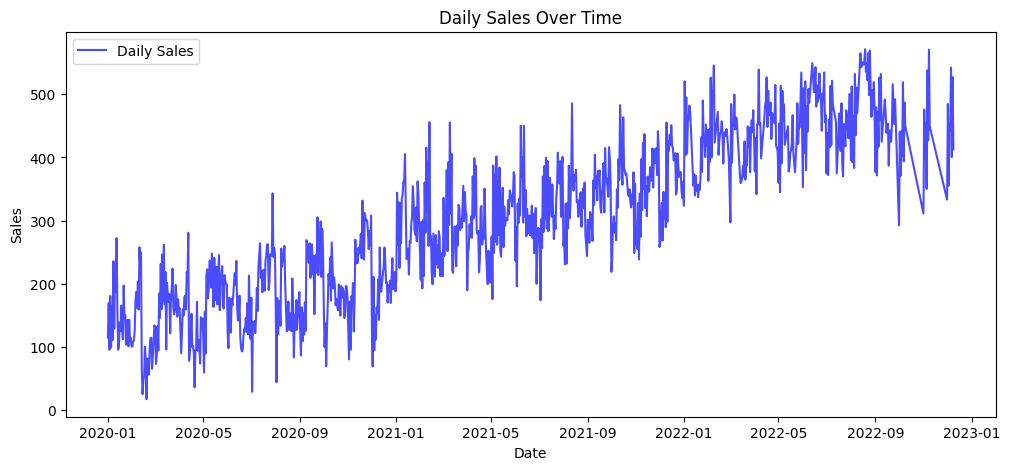

In [42]:

# Plot sales trends
plt.figure(figsize=(12, 5))
plt.plot(df["date"], df["sales"], label="Daily Sales", color='blue', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Daily Sales Over Time")
plt.legend()
plt.show()

Seasonal Decomposition of Time Series

We apply additive seasonal decomposition to split the time series into:
- **Trend**: Long-term direction
- **Seasonality**: Repeating short-term cycle (e.g., weekly pattern)
- **Residual**: Random noise

This helps identify hidden patterns in the sales data.


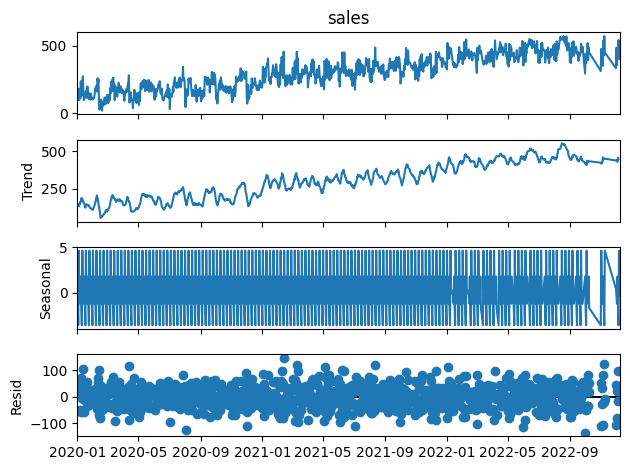

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition
decomposition = seasonal_decompose(df.set_index("date")["sales"], model="additive", period=7)

# Plot components
decomposition.plot()
plt.show()

Interpreting the Decomposition

- **Trend** shows the overall growth or decline in sales over time.
- **Seasonal** shows weekly repeating cycles (e.g., weekends, promotions).
- **Residual** captures the random noise not explained by trend or seasonality.

Understanding these components helps improve forecasting and business decisions.


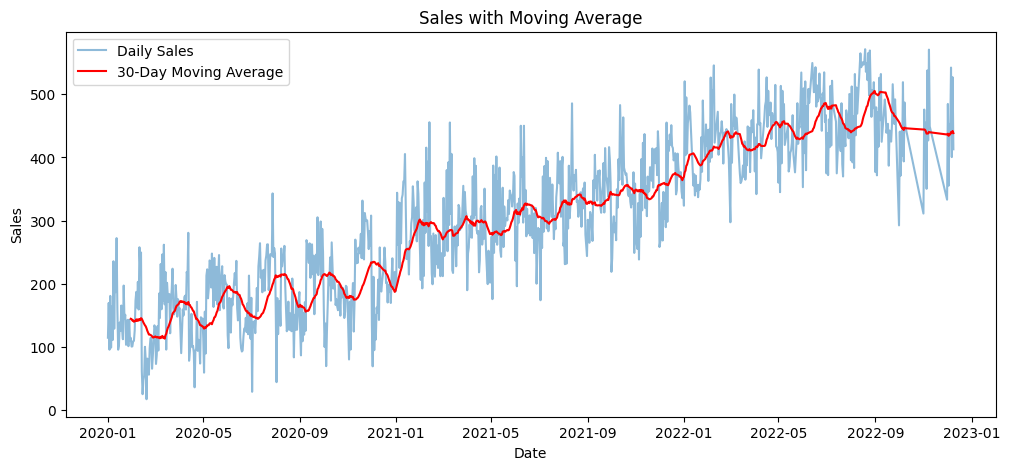

In [44]:
df["moving_avg"] = df["sales"].rolling(window=30).mean()

# Plot sales and moving average
plt.figure(figsize=(12, 5))
plt.plot(df["date"], df["sales"], label="Daily Sales", alpha=0.5)
plt.plot(df["date"], df["moving_avg"], label="30-Day Moving Average", color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales with Moving Average")
plt.legend()
plt.show()

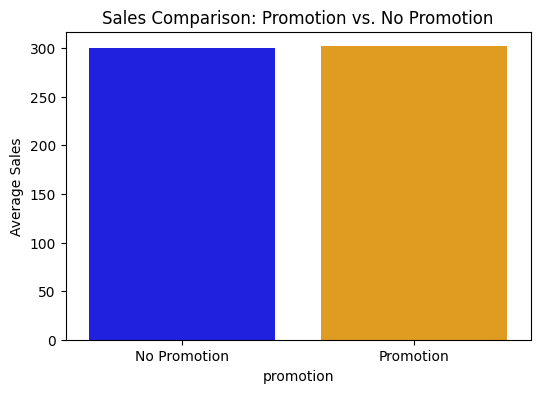

In [45]:
import seaborn as sns

# Group by promotion status
promo_sales = df.groupby("promotion")["sales"].mean()

# Plot comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=promo_sales.index, y=promo_sales.values, palette=["blue", "orange"])
plt.xticks([0, 1], ["No Promotion", "Promotion"])
plt.ylabel("Average Sales")
plt.title("Sales Comparison: Promotion vs. No Promotion")
plt.show()

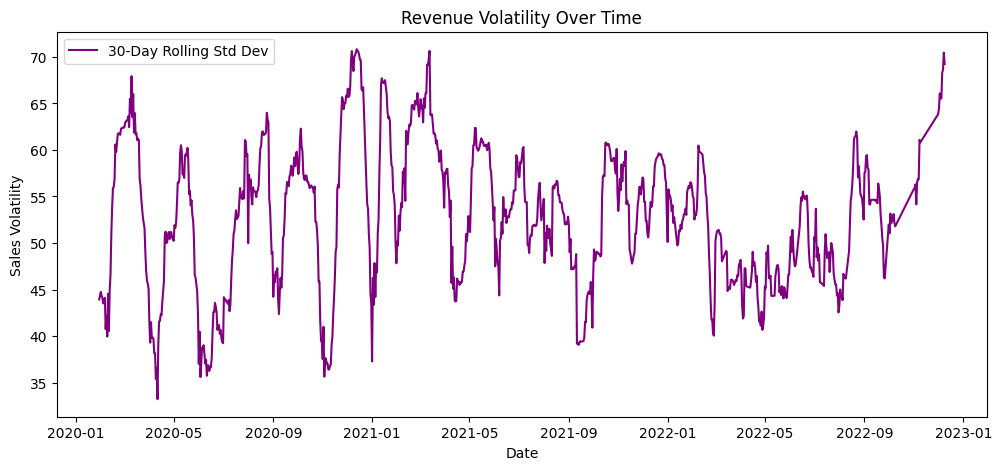

In [46]:
df["rolling_std"] = df["sales"].rolling(window=30).std()

# Plot revenue fluctuations
plt.figure(figsize=(12, 5))
plt.plot(df["date"], df["rolling_std"], label="30-Day Rolling Std Dev", color="purple")
plt.xlabel("Date")
plt.ylabel("Sales Volatility")
plt.title("Revenue Volatility Over Time")
plt.legend()
plt.show()

NameError: name 'forecast' is not defined

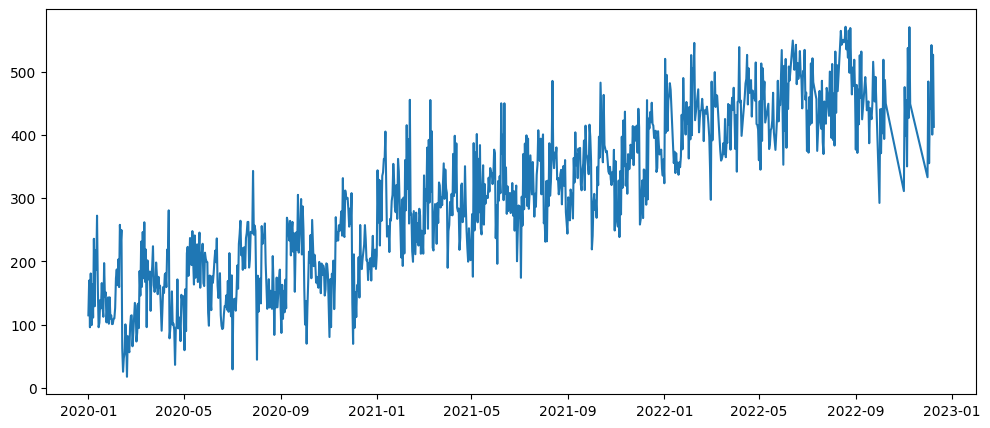

In [47]:
# Generate forecast dates
forecast_dates = pd.date_range(df["date"].iloc[-1] + pd.Timedelta(days=1), periods=30, freq="D")

# Plot sales and forecasted values
plt.figure(figsize=(12, 5))
plt.plot(df["date"], df["sales"], label="Historical Sales")
plt.plot(forecast_dates, forecast, label="Forecasted Sales", color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast for the Next 30 Days")
plt.legend()
plt.show()

Conclusion and Business Insights

This time series analysis provides critical insights for ABC Retail Ltd.:

- Sales show clear **weekly seasonality**.
- Certain periods have significant **spikes**, possibly due to **promotions or holidays**.
- These insights can improve **inventory planning**, **promotion timing**, and **revenue forecasting**.

Next steps could involve building predictive models like **ARIMA**, **Prophet**, or **LSTM** to make forward-looking sales forecasts.
